# Quantifying non-classical teleportation
## Ivan Supic, Paul Skrzypczyk and Daniel Cavalcanti
### Jupyter notebook to accompany arXiv:xxxx.xxxx

#### Introduction

In this notebook we reproduce all of the figures that appear in the above paper. 

To run this notebook you will need:

- Matlab with the [API for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html) installed.
- The [Calysto Matlab kernel for Python](https://github.com/Calysto/matlab_kernel) 
- [CVX](http://cvxr.com/) Software for Disciplined Convex Programming 
- [QETlab](http://www.qetlab.com/Main_Page) a MATLAB toolbook for quantum entanglement.
- The codes provided in this the github repository

## Figure 2: teleportation robustness

Here we will look at teleportation using the one-parameter family of states 

$$ \rho = p\left|\Phi^+\right\rangle \left\langle \Phi^+ \right| + (1-p)\left| 01 \right\rangle \left\langle 01 \right| $$
using a full Bell-State-Measurement (BSM), and with input states $\omega_x$ the 6 eigenstates of the Pauli spin operators $X$, $Y$ and $Z$. 

In [1]:
d = 2; % local dimension of all systems 
k = 2; % level of Doherty hierarchy to use

% states

rhoME = MaxEntangled(d)*MaxEntangled(d)';
rho01 = [0 1 0 0]'*[0 1 0 0];
rhoId = eye(d^2)/d^2;

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% (tomographically complete) input states

for x = 1:3
    for a = 0:1
        omegax(:,:,1+a+2*(x-1)) = (eye(2) + (-1)^a*Pauli(x))/2;
    end
end

Produce the data for the graph:

In [2]:
npoints = 101; % number of points to plot
pv = linspace(0,1,npoints); 

TRG2v = zeros(1,npoints);
TRC2v = zeros(1,npoints);
TRR2v = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRG2v(i) = teleportationRobustness(sigax,omegax,k);
    TRC2v(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRR2v(i) = teleportationRandomRobustness(sigax,omegax,k);
    
end

We also want to compare to the average fidelity of teleportation that can be acheived with this family of states. 

In [3]:
Ftel2v = zeros(1,npoints);

for i = 1:npoints
    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    for a = 1:4
        Ftel2v(i) = max(Ftel2v(i),trace(rho*Ma(:,:,a))); 
        % We check the fidelity with the 4 outcomes of the BSM, since this is sufficient in this case to
        % find the average fidelity of teleportation
    end
end

Plot the graph:

Current plot held


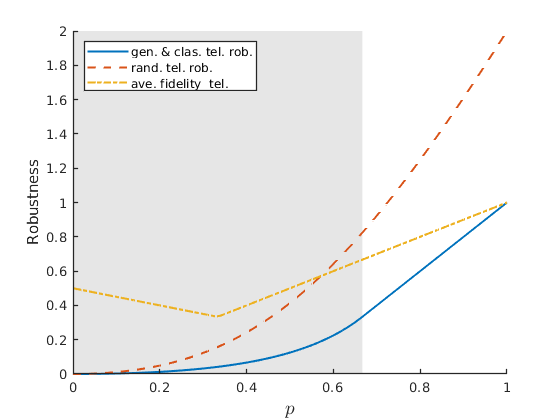

In [9]:
%plot inline
r = rectangle('Position',[0 0 2/3 2]');
r.FaceColor = [0.9,0.9,0.9];
r.LineStyle = 'none';

hold;

plot(pv,TRG2v,pv,TRR2v,'--',pv,Ftel2v,'-.','LineWidth',1.5)
legend({'gen. & clas. tel. rob.',...
'rand. tel. rob.','ave. fidelity  tel.'},'Location','northwest')
xlabel('$p$','Interpreter','latex','FontSize',14)
ylabel('Robustness')

Fig2 = gca;
Fig2.FontName = 'Times';
Fig2.LineWidth = 1;
Fig2.Layer = 'top';

axis tight
set(gcf, 'Units','centimeters', 'Position',[0 0 8.6 6.4])

We see that all three robustnesses are larger than 0 for all $p> 0$, as expected. Moreover, the random teleportation is largest, while the classical and generalised teleportation robustnesses coincide, just as the separable and generalised entanglement robustnesses do.

## Figure 3: teleportation weight

In this figure we will look at the same state from above, but now we will look at the Teleportation Weight (TW) instead. We will consider a partial BSM as well as the full BSM, and consider non-tomographically complete sets of states -- eigenstates of $X$ and $Y$ only.

In [10]:
% (partial) Bell state measurement

Na = zeros(d^2,d^2,2);
Na(:,:,1) = Ma(:,:,1);
Na(:,:,2) = eye(d^2) - Na(:,:,1);

% (non tomographically complete) input states

chix = omegax(:,:,1:4);

Produce the data for the graph:

In [11]:
npoints = 101; 
pv = linspace(0,1,npoints);

TWftv = zeros(1,npoints);
TWptv = zeros(1,npoints);
TWfiv = zeros(1,npoints);
TWpiv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rhoId;
    
    sigax = genTeleportationData(rho,Ma,omegax);
    TWftv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Na,omegax);
    TWptv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Ma,chix);
    TWfiv(i) = teleportationWeight(sigax,chix,k);
    
    sigax = genTeleportationData(rho,Na,chix);
    TWpiv(i) = teleportationWeight(sigax,chix,k);
    
end

Plot the graph:

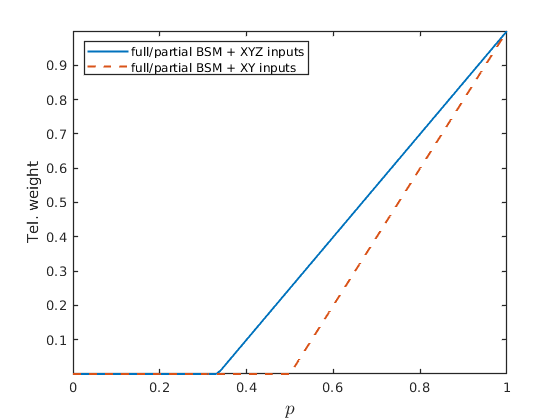

In [18]:
%plot inline

plot(pv,TWftv,pv,TWfiv,'--','LineWidth',1.5)
legend({'full/partial BSM + XYZ inputs','full/partial BSM + XY inputs'},'Location','northwest')
xlabel('$p$','Interpreter','latex','FontSize',14)
ylabel('Tel. weight')

Fig3 = gca;
Fig3.FontName = 'Times';
Fig3.LineWidth = 1;

axis tight
set(gcf, 'Units','centimeters', 'Position',[0 0 8.6 6.4])

## Figure 4: teleportation using the Horodecki state

We now want to consider the Horodecki state in $\mathbb{C}^3 \otimes \mathbb{C}^3$ shared between Alice and Bob, and for Alice to perform a partial Bell State Measurement (i.e. projector onto $\left|\Phi^+_3\right\rangle$, and the orthogonal complement). 

For input states we will use the fact that a set of $d^2$ randomly chosen pure states from $\mathbb{C}^d$ form a tomographically complete set of states. Thus we can choose 9 pure states from $\mathbb{C}^3$ at random to produce the figure. 


In [28]:
d = 3;
k = 2;

% partial Bell state measurement

Ma = zeros(d^2,d^2,2);
Ma(:,:,1) = MaxEntangled(d)*MaxEntangled(d)';
Ma(:,:,2) = eye(d^2) - Ma(:,:,1);
% input states (randomly choisen)

omegax = zeros(d,d,d^2);
for i = 1:d^2
    psi = RandomStateVector(d);
    omegax(:,:,i) = psi*psi';
end

Produce the data for the graph:

In [29]:
npoints = 101; 
av = linspace(0,1,npoints);

TRGv = zeros(1,npoints);
TRCv = zeros(1,npoints);
TRRv = zeros(1,npoints);
TWv = zeros(1,npoints);

for i = 1:npoints

    rho = HorodeckiState(av(i));
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRGv(i) = teleportationRobustness(sigax,omegax,k);
    TRCv(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRRv(i) = teleportationRandomRobustness(sigax,omegax,k);
    TWv(i) = teleportationWeight(sigax,omegax,k);
    
end

Plot the graph:

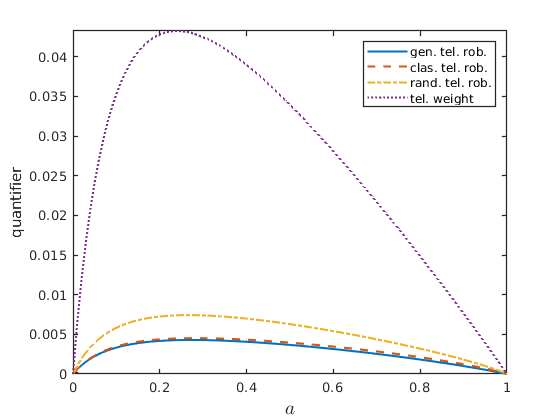

In [32]:
%plot inline

plot(av,TRGv,av,TRCv,'--',av,TRRv,'-.',av,TWv,':','LineWidth',1.5)
legend({'gen. tel. rob.','clas. tel. rob.',...
'rand. tel. rob.','tel. weight'})
xlabel('$a$','Interpreter','latex','FontSize',14)
ylabel('quantifier')

Fig4 = gca;
Fig4.FontName = 'Times';
Fig4.LineWidth = 1;

axis tight
set(gcf, 'Units','centimeters', 'Position',[0 0 8.6 6.4])

## Figure 5: Teleportation Negativity

Finally we we look at the Teleportation Negativity. We will go back to the state considered in Fig. 2. 

In [19]:
d = 2; % local dimension of all systems 
k = 2; % level of Doherty hierarchy to use

% states

rhoME = MaxEntangled(d)*MaxEntangled(d)';
rho01 = [0 1 0 0]'*[0 1 0 0];

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% (tomographically complete) input states

omegax = zeros(d,d,6);
for x = 1:3
    for a = 0:1
        omegax(:,:,1+a+2*(x-1)) = (eye(2) + (-1)^a*Pauli(x))/2;
    end
end

Produce the data for the graph:

In [20]:
npoints = 101; % number of points to plot
pv = linspace(0,1,npoints); 

TNv = zeros(1,npoints);
Nv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TNv(i) = teleportationNegativity(sigax,omegax);
    Nv(i) = Negativity(rho);
    
end

Plot the graph:

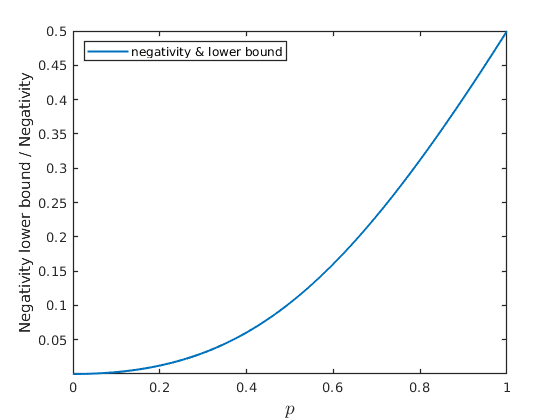

In [27]:
%plot inline

plot(pv,TNv,'LineWidth',1.5)
legend({'negativity & lower bound'},'Location','northwest')
xlabel('$p$','Interpreter','latex','FontSize',14)
ylabel('Negativity lower bound / Negativity')

Fig5 = gca;
Fig5.FontName = 'Times';
Fig5.LineWidth = 1;

axis tight
set(gcf, 'Units','centimeters', 'Position',[0 0 8.6 6.4])